In [26]:
import torch
from diffusers import StableDiffusionPipeline, ControlNetModel
from torchvision.transforms import ToTensor, Normalize
import numpy as np
import cv2
import docx2txt

In [14]:
device = torch.device("cuda:0")  # Use GPU 0

In [15]:
np.random.seed(12345)

In [16]:
model = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

C:\Users\aryan\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [17]:
# Load ControlNet model
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-depth")

In [18]:
# Suppress warnings
warnings.filterwarnings("ignore", message="Consider using IPython.display.IFrame instead")

In [23]:
# Load depth map
depth_map = cv2.imread(r"C:\Users\aryan\OneDrive\Documents\Metadata-20241003T182419Z-001\Metadata\No Crop\2_nocrop.png")
depth_map = ToTensor()(depth_map).unsqueeze(0)

  0%|          | 0/50 [00:00<?, ?it/s]

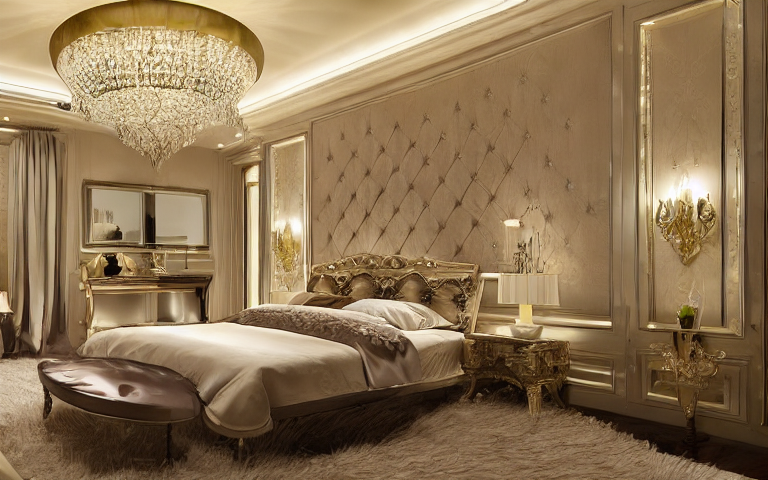

In [28]:
# Generate image using ControlNetModel
image = model(prompt="luxury bedroom interior", height=480, width=768, controlnet=controlnet, controlnet_conditioning=depth_map).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

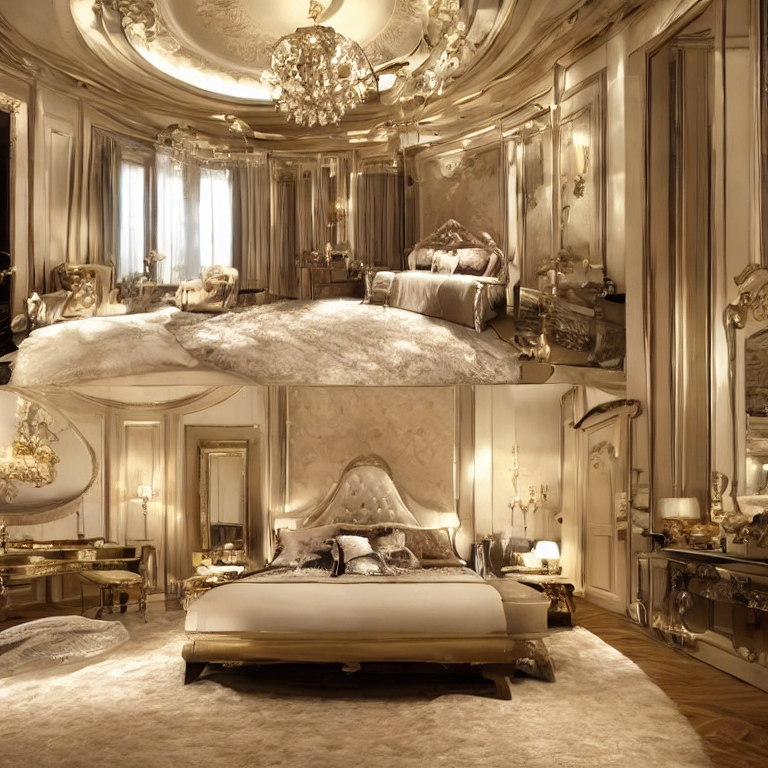

In [24]:
# Generate image using ControlNetModel
image = model(prompt="luxury bedroom interior", height=768, width=768, controlnet=controlnet, controlnet_conditioning=depth_map).images[0]
image

In [27]:
# Load prompts from the Word document
prompts = docx2txt.process("C:\\Users\\aryan\\OneDrive\\Documents\\Metadata-20241003T182419Z-001\\Metadata\\prompts.docx")
prompts = prompts.split("\n")

# Load depth images
depth_dir = "C:\\Users\\aryan\\OneDrive\\Documents\\Metadata-20241003T182419Z-001\\Metadata\\Images"
depth_files = os.listdir(depth_dir)

# Process each image and prompt pair
for i, (prompt, depth_file) in enumerate(zip(prompts, depth_files)):
    # Load depth image
    if depth_file.endswith(".npy"):
        depth_image = np.load(os.path.join(depth_dir, depth_file))
    else:
        depth_image = cv2.imread(os.path.join(depth_dir, depth_file))

    # Convert depth image to tensor
    depth_image_tensor = ToTensor()(depth_image).unsqueeze(0).to(device)

    # Generate image with controlnet
    with torch.autocast("cuda"):
        image = model(prompt, image=depth_image_tensor, controlnet=controlnet).images[0]

    # Save generated image
    image.save(f"output_{i}.png")

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]